In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(800, 800)
(225, 225)
(975, 768)


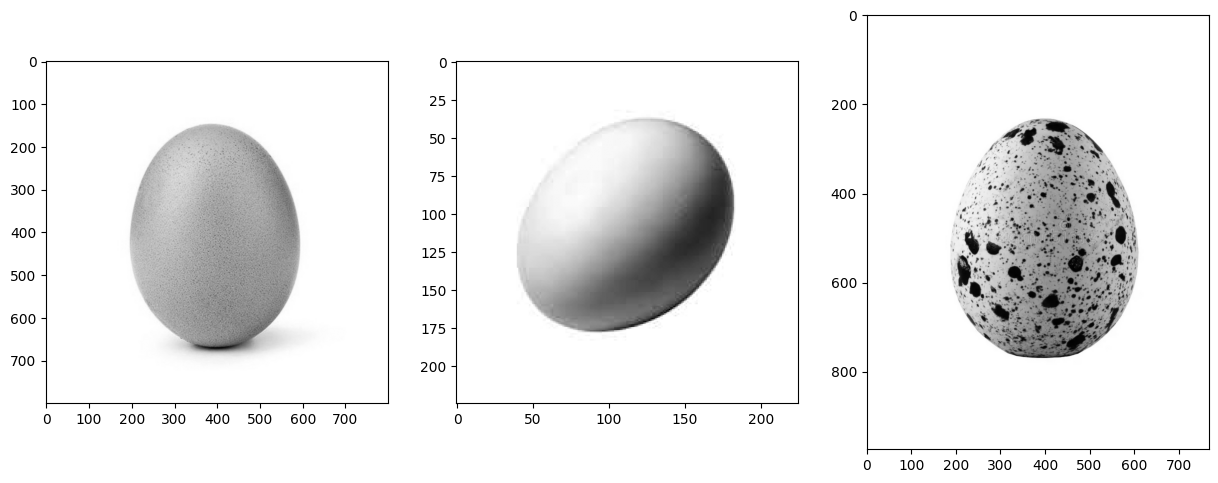

In [2]:
ayam = cv.imread('dataset/ayam/chicken-1.jpeg', cv.IMREAD_GRAYSCALE)
bebek = cv.imread('dataset/bebek/bebek-10.jpg', cv.IMREAD_GRAYSCALE)
puyuh = cv.imread('dataset/puyuh/puyuh-1.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh, cmap='gray')

print(ayam.shape)
print(bebek.shape)
print(puyuh.shape)

In [3]:
def cropResize(img, resize):
    h, w = img.shape[:2]
    min_dim = min(h, w)

    start_x = (w - min_dim) // 2
    start_y = (h - min_dim) // 2

    cropped_img = img[start_y:start_y + min_dim, start_x:start_x + min_dim]

    resize_img = cv.resize(cropped_img, (resize,resize))

    return resize_img

Rt = np.array([[1, 0],
               [0, -1]])

Rk = np.array([[0, 1],
               [-1, 0]])

def padding_baris(image):
    height, width = image.shape
    img_pad = np.zeros((height, width+1))
    for i in range(height):
        for j in range(width):
            img_pad[i][j] = image[i][j]
    return img_pad

def padding_kolom(image):
    height, width = image.shape
    img_pad = np.zeros((height+1, width))
    for i in range(height):
        for j in range(width):
            img_pad[i][j] = image[i][j]
    return img_pad

def convo_edge(image, kernel, jenis):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    if(jenis != 'robert'):
        padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    else:
        padded_baris = padding_baris(image)
        padded_img = padding_kolom(padded_baris)

    result = np.zeros((img_height, img_width))

    for i in range(img_height):
        for j in range(img_width):
            result[i, j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result

def deteksi_tepi(image, kernelX, kernelY, jenis):
    hasilX = convo_edge(image, kernelX, jenis)
    hasilY = convo_edge(image, kernelY, jenis)

    M = np.sqrt((hasilX * hasilX) + (hasilY * hasilY))

    return M

def thresholding(citra, ambang):
    height, width = citra.shape
    hasil = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            if citra[i, j] >= ambang:
                hasil[i, j] = 255
            else:
                hasil[i, j] = 0
    return hasil

def dilasi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center_y = k_height // 2
    k_center_x = k_width // 2

    padded_img = np.pad(image, ((k_center_y, k_center_y), (k_center_x, k_center_x)),
                        mode='constant', constant_values=0)

    hasil = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            bagian = padded_img[i:i + k_height, j:j + k_width]
            if np.any((bagian == 255) & (kernel == 1)):
                hasil[i, j] = 255
    return hasil

def erosi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center_y = k_height // 2
    k_center_x = k_width // 2

    padded_img = np.pad(image, ((k_center_y, k_center_y), (k_center_x, k_center_x)), 
                        mode='constant', constant_values=0)

    hasil = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            cocok = True
            for k in range(k_height):
                for l in range(k_width):
                    if kernel[k, l] == 1 and padded_img[i + k, j + l] != 255:
                        cocok = False
                        break
                if not cocok:
                    break
            if cocok:
                hasil[i, j] = 255
    return hasil


### prepro1

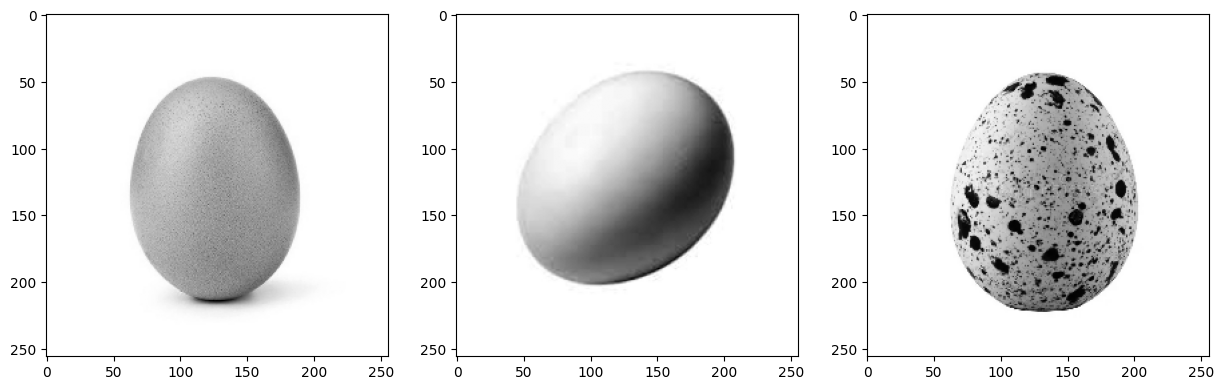

In [4]:
ayam_cr = cropResize(ayam, 256)
bebek_cr = cropResize(bebek, 256)
puyuh_cr = cropResize(puyuh, 256)

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam_cr,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek_cr,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh_cr, cmap='gray')

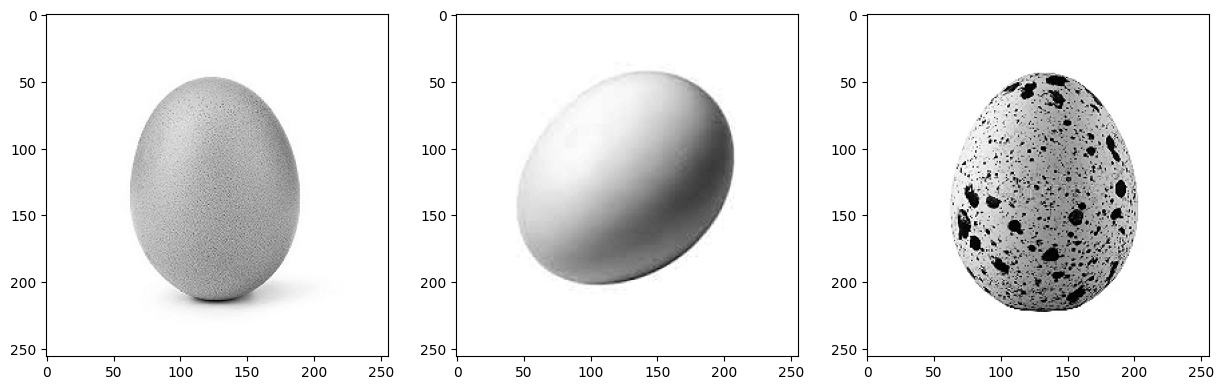

In [5]:
kernel = np.array([[0, -0.25, 0],
                   [-0.25, 2, -0.25],
                   [0, -0.25, 0]])

ayam_sr = cv.filter2D(ayam_cr, -1, kernel)
bebek_sr = cv.filter2D(bebek_cr, -1, kernel)
puyuh_sr = cv.filter2D(puyuh_cr, -1, kernel)

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam_sr,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek_sr,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh_sr, cmap='gray')

### prepro2

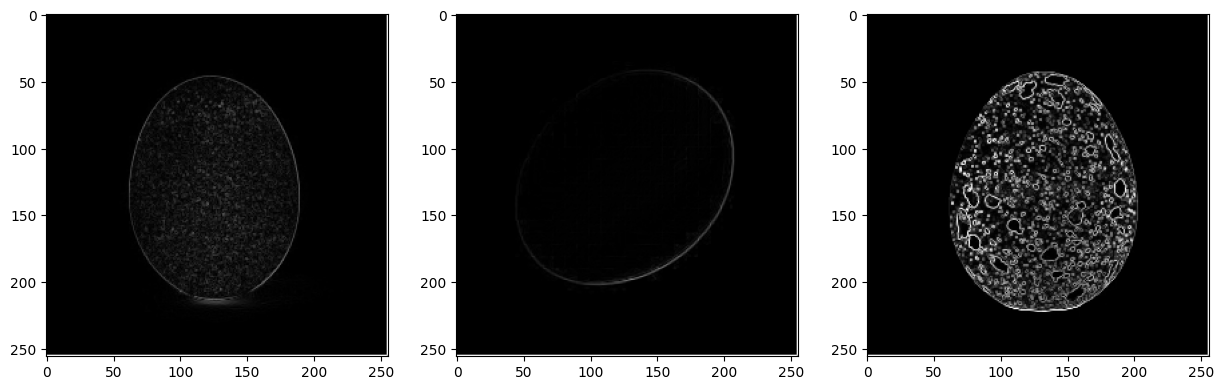

In [6]:
ayam_rt = deteksi_tepi (ayam_sr, Rt, Rk, 'robert')
bebek_rt = deteksi_tepi (bebek_sr, Rt, Rk, 'robert')
puyuh_rt = deteksi_tepi (puyuh_sr, Rt, Rk, 'robert')

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam_rt,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek_rt,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh_rt, cmap='gray')

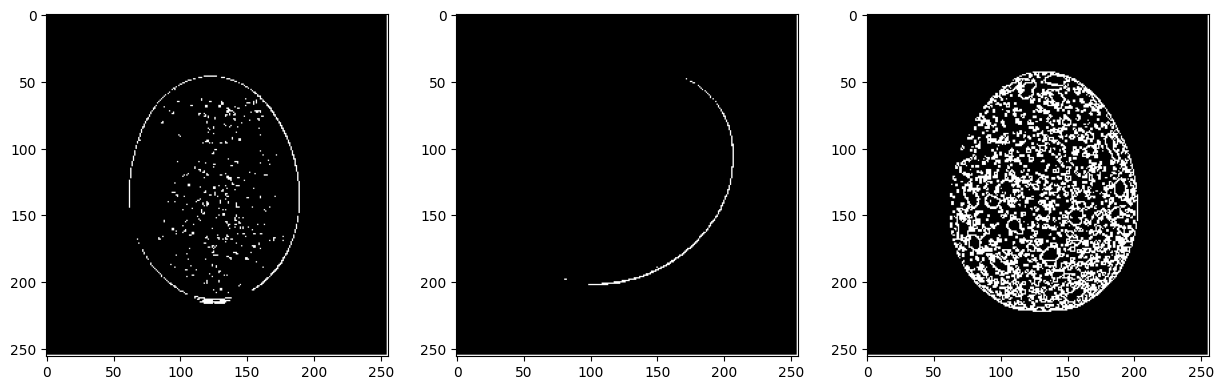

In [7]:
ayam_th = thresholding(ayam_rt, 64)
bebek_th = thresholding(bebek_rt, 64)
puyuh_th = thresholding(puyuh_rt, 64)

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam_th,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek_th,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh_th, cmap='gray')

In [8]:
kernelMorfologi = np.array ([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]])

### prepro3

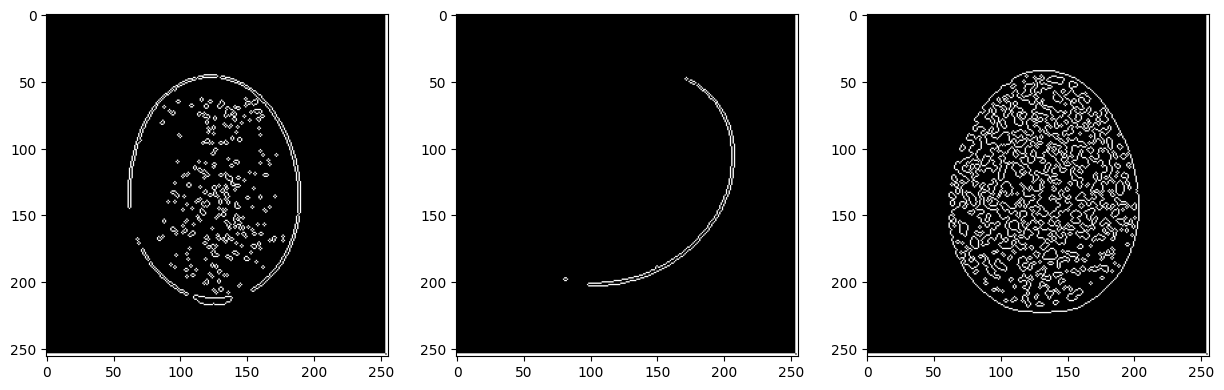

In [10]:
ayam_d = dilasi(ayam_th, kernelMorfologi)
ayam_e = erosi(ayam_d, kernelMorfologi)
bebek_d = dilasi(bebek_th, kernelMorfologi)
bebek_e = erosi(bebek_d, kernelMorfologi)
puyuh_d = dilasi(puyuh_th, kernelMorfologi)
puyuh_e = erosi(puyuh_d, kernelMorfologi)

ayam_g = ayam_d - ayam_e
bebek_g = bebek_d - bebek_e 
puyuh_g = puyuh_d - puyuh_e

#gradient morfologi

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(ayam_g,  cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(bebek_g,  cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(puyuh_g, cmap='gray')